***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python MicroKinetics Code}}$$<br>
$\mathbf{\text{Date: 09/22}}$<br>
***

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Model:

# ***
$\mathbf{\text{Micro Kinetic Model for (an 11-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
$Ea = 80kJ{mol}^{-1}<->120kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO / Desorption of CO* 

$$ CO(g) + * \rightleftharpoons CO^{*} $$  <br> 

Reaction 2:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$ 

$$ {O_2}(g) + * \rightleftharpoons {{O_2}^{*}} $$  <br> 

Reaction 3:&emsp;Dissociation of ${O_2}^*$ / Recombination of O* 

$$ {{O_2}^{*}} + *  \rightleftharpoons {O^{*}} +  {O^{*}} $$  <br> 

Reaction 4:&emsp;CO Oxidation Reaction (Implied Adsorption of $CO_2$)

$$ {{CO}^{*}} + {{O}^{*}} \rightleftharpoons {{CO}_2}(g) + * + * $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ $


### The Atomic/Species Matrix ($\nu$):


\begin{equation}
\
\nu=\begin{bmatrix}
          &   CO    &   O_2   &   CO_2  &     {CO^*}    &    {O*}      & {O_2^*}     &   *  \\
C         &   1     &   0     &   1     &      1        &    0         &     0       &    0\\
O         &   1     &   2     &   2     &      1        &    1         &     2       &    0\\
*         &   0     &   0     &   0     &      1        &    1         &     1       &    1\end{bmatrix}
\
\end{equation}

Atomic Matrix Size : (4x11)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO}  &P_{O_2} & P_{CO_2} & \theta_{CO}    & \theta_{O}     & \theta_{O_2}  &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1          &      0         &     0          &  -1\\
r_2 &   0     &  -1     &   0     &      0          &      0         &     1          &  -1\\
r_3 &   0     &   0     &   0     &      0          &      2         &    -1          &  -1\\  
r_4 &   0     &   0     &   1     &     -1          &     -1         &     0          &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (11x11)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

In [2]:
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model

Mass is conserved. 



In [3]:
MKM1.Atomic

,A\S,CO,O2,CO2,CO*,O*,O2*,*
0,C,1,0,1,1,0,0,0
1,O,1,2,2,1,1,2,0
2,*,0,0,0,1,1,1,1


In [4]:
MKM1.Stoich #prints out the Stoichiometric Matrix Used

,r\S,P_CO,P_O2,P_CO2,theta_CO,theta_O,theta_O2,theta_*
0,r1,-1,0,0,1,0,0,-1
1,r2,0,-1,0,0,0,1,-1
2,r3,0,0,0,0,2,-1,-1
3,r4,0,0,1,-1,-1,0,2


In [5]:
MKM1.Param.iloc[5:13,1:3]

,Parameter,Values
5,k1f,2.490000e-01
6,k1r,5.580000e-02
7,k2f,7.770000e+02
8,k2r,4.550000e+09
9,k3f,1.360000e+05
10,k3r,4.610000e-11
11,k4f,1.140000e+00
12,k4r,0.000000e+00


In [6]:
MKM1.k

array([2.49e-01, 5.58e-02, 7.77e+02, 4.55e+09, 1.36e+05, 4.61e-11,
       1.14e+00, 0.00e+00])

In [7]:
# s = np.arange(4,13)
# for i in s:
#     MKM1.k[i] = MKM1.k[i]*0.002
# MKM1.k[20] = MKM1.k[20]* 1e5

In [8]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions(Pr=[4e-1,1e-5,1e-5]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=4e8)#Sets the reange of time used in integration

(0, 400000000.0)

<IPython.core.display.Javascript object>


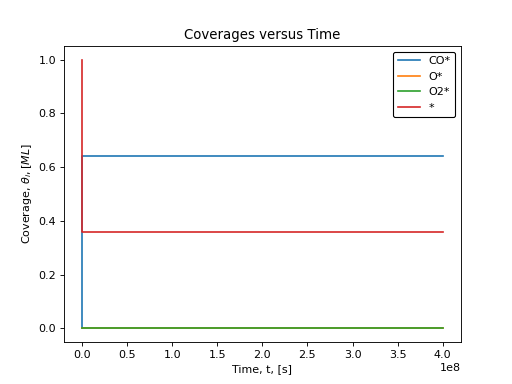

CPU times: user 1.89 s, sys: 12.6 ms, total: 1.9 s
Wall time: 1.9 s


In [9]:
%%time
sol1,solt1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

<IPython.core.display.Javascript object>


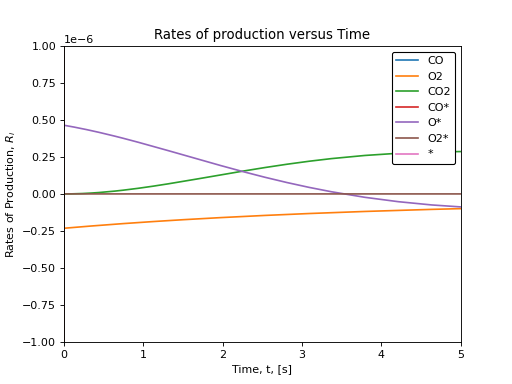

CPU times: user 1.1 s, sys: 13.5 ms, total: 1.11 s
Wall time: 1.11 s


(0.0, 5.0)

In [10]:
%%time
sol2,solt2= MKM1.solve_rate_production(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)
plt.ylim([-1e-6,1e-6])
plt.xlim([0,5])

In [11]:
# MKM1.k = MKM1.kextract()
# s = np.arange(3,5)
# print(s)
# for i in s:
# #     MKM1.k[i] = MKM1.k[i]*1e-5
# # MKM1.k[20] = MKM1.k[20]* 1e5

In [12]:
print(MKM1.k)

[2.49e-01 5.58e-02 7.77e+02 4.55e+09 1.36e+05 4.61e-11 1.14e+00 0.00e+00]


### Calculating the Degree of Rate Control,  $X_{RC}$

$$ X_{RC} = \frac{k_{i}^{o}}{r^o} \left(\frac{\partial r}{\partial k}\right)_{k_i = constant} $$


$$ X_{RC} \approxeq \frac{r-r^o}{p_{inc}*r^o} $$

$$p_{inc} = 10\% $$


In [13]:
a = MKM1.get_SS_X_RC(p_inc=0.1,k_o_inp=MKM1.k)
print((a))

Steady State Reached
0
before:
[2.49e-01 5.58e-02 7.77e+02 4.55e+09 1.36e+05 4.61e-11 1.14e+00 0.00e+00]
after
[2.739e-01 6.138e-02 7.770e+02 4.550e+09 1.360e+05 4.610e-11 1.140e+00
 0.000e+00]
Steady State Reached
1
before:
[2.739e-01 6.138e-02 7.770e+02 4.550e+09 1.360e+05 4.610e-11 1.140e+00
 0.000e+00]
after
[2.739e-01 6.138e-02 8.547e+02 5.005e+09 1.360e+05 4.610e-11 1.140e+00
 0.000e+00]
Steady State Reached
2
before:
[2.739e-01 6.138e-02 8.547e+02 5.005e+09 1.360e+05 4.610e-11 1.140e+00
 0.000e+00]
after
[2.739e-01 6.138e-02 8.547e+02 5.005e+09 1.496e+05 5.071e-11 1.140e+00
 0.000e+00]
Steady State Reached
3
before:
[2.739e-01 6.138e-02 8.547e+02 5.005e+09 1.496e+05 5.071e-11 1.140e+00
 0.000e+00]
after
[2.739e-01 6.138e-02 8.547e+02 5.005e+09 1.496e+05 5.071e-11 1.254e+00
 0.000e+00]
Steady State Reached
[-1.9512505834975343e-06, -4.99999609723686, -4.500000090161068, 0.9999999999999927]


In [90]:
a = MKM1.get_SS_X_RC(p_inc=0.1,k_o_inp=MKM1.k)
print((a))

Steady State Reached
[-2.249433066978303e-06, 9.458920686290273e-06, 0.9999900470771241, 1.2222727619979458e-07]


In [38]:
#Constant Pressures
P_O2 = 1e-5
P_CO2 = 0#10e-9

In [43]:
%%time
# MKM1.k = []
CO_pressure = np.linspace(0,90,20)*1e-7 #Vector of CO_pressures
CO_ss_covg = []
O_ss_covg = []
CO2_ss_rprod = []

blockPrint() #Blocs the corresponding prints of the following code. i.e the status of steady state calculations from being displayed
for i in np.arange(len(CO_pressure)):
    MKM1.set_rxnconditions(Pr=[CO_pressure[i],P_O2,P_CO2]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)  
    ss_covg = MKM1.get_SS_coverages()
    ss_prod = MKM1.get_SS_rates_production()
    CO_ss_covg.append(ss_covg[0]) #Extracting steady state CO Coverage
    O_ss_covg.append(ss_covg[1]) #Extracting steady state O Coverage
    CO2_ss_rprod.append(ss_prod[2]) #Extracting TOF of CO2

enablePrint() #Re-enables priniting

CPU times: user 10.5 s, sys: 36.7 ms, total: 10.6 s
Wall time: 10.6 s


<IPython.core.display.Javascript object>


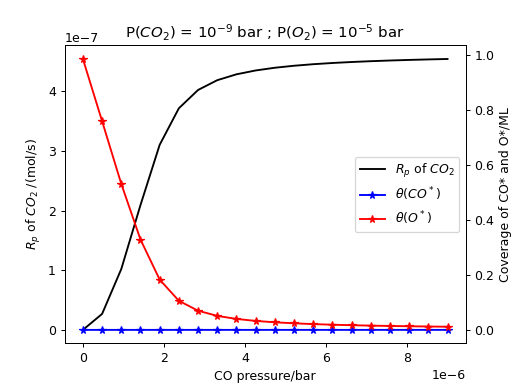

In [44]:
fig,ax = plt.subplots()
lns1 = ax.plot(CO_pressure,CO2_ss_rprod,'k-',label=r'$R_p$ of ${CO}_2$')
ax.set_xlabel('CO pressure/bar')
ax.set_ylabel(r'$R_p$ of $CO_2$ /(mol/s)')
ax.set_title(r'P($CO_2$) = $10^{-9}$ bar ; P($O_2$) = $10^{-5}$ bar')
ax.legend(loc='right')

ax2 = ax.twinx()
lns2 = ax2.plot(CO_pressure,CO_ss_covg,'b*-',label=r'$\theta(CO^*)$')
lns3 = ax2.plot(CO_pressure,O_ss_covg,'r*-',label=r'$\theta(O^*)$')
ax2.set_ylabel('Coverage of CO* and O*/ML')

#For legend purposes:
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='center right')
# ax.set_xscale('log')

plt.show()


In [ ]:
print(MKM1.get_SS_coverages()) #Printing the Steady state coverages (Note: Additional options can be set manually - See main.py for syntax)

Other possible features that weren't used (but also work) include:
- solve_rate_reaction(tf=None,initial_coverage=[],plot=False)
- solve_rate_production(tf=None,initial_coverage=[],plot=False)
- get_SS_rates_reaction(tf=None)
- get_SS_rates_production(tf=None)

### Dynamic Pressure Modulation

In [ ]:
sol2,solt2 = MKM1.dynamic_transient_rates_production(State1=[0.2e-9,2e-6,1e-8],State2=[2e-9,2e-6,1e-8],plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions

Other possible features that weren't used (but also work) include:
- dynamic_transient_rates_reaction(State1=[],State2=[],plot=False)
- dynamic_transient_rates_production(State1=[],State2=[],plot=False)

### Including Coverage Dependance (Making use of the MKModel_wCD subpackage)

In [ ]:
MKM1CD = MKModel_wCD('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model

In [ ]:
MKM1CD.set_initial_coverages(init=[0,0,0]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1CD.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1CD.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

In [ ]:
sol1CD,solt1CD= MKM1CD.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [ ]:
print(MKM1CD.get_SS_coverages()) #Printing the Steady state coverages (Note: Additional options can be set manually - See main.py for syntax)

The same additional features also exist in this subpackage

### Dynamic Pressure Modulation

In [ ]:
MKM1CD.set_limits_of_integration(Ti=0,Tf=0.4e6) #Changing the time interval so as to view the plot better

In [ ]:
sol2CD,solt2CD = MKM1CD.dynamic_transient_rates_production(State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions

# ----------------------------------------------------------------------------------------

# Fitting:

## Without CD

### Model 1:

In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit1_a = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_a,covg1_a,fits1_a = fit1_a.fitting_rate_param(option='cf',plot=True) #cf stands for curve fit

In [ ]:
%%time 
#Fitting for Model 1: (without CD) #using function minizer
fit1_b = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_b,covg1_b,fits1_b = fit1_b.fitting_rate_param(option='min',plot=True) #min stands for minimize